In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np

In [2]:
train=pd.read_csv("sales_train_v2.csv")
test=pd.read_csv("test.csv")
items=pd.read_csv("items.csv")
categories=pd.read_csv("item_categories.csv")
shops=pd.read_csv("shops.csv")
submission=pd.read_csv("sample_submission.csv")

In [3]:
train.head(1)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0


In [4]:
test.head(1)

,ID,shop_id,item_id
0,0,5,5037


In [5]:
items.head(1)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40


In [6]:
categories.head(1)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0


In [7]:
shops.head(1)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0


In [8]:
categories.head(1)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0


In [9]:
dataset=pd.merge(items,train)
dataset.head(1)

,item_name,item_id,item_category_id,date,date_block_num,shop_id,item_price,item_cnt_day
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,01.09.2014,20,54,58.0,1.0


In [10]:
data=pd.merge(dataset,categories)
data.head(1)

,item_name,item_id,item_category_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,01.09.2014,20,54,58.0,1.0,Кино - DVD


In [11]:
datas=pd.merge(data,shops)
datas.head(1)

,item_name,item_id,item_category_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_name,shop_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,01.09.2014,20,54,58.0,1.0,Кино - DVD,"Химки ТЦ ""Мега"""


In [12]:
new_data=pd.merge(datas,test)
new_data.head(1)

,item_name,item_id,item_category_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_name,shop_name,ID
0,007: КООРДИНАТЫ «СКАЙФОЛЛ»,30,40,13.02.2013,1,56,399.0,1.0,Кино - DVD,"Чехов ТРЦ ""Карнавал""",160687


In [13]:
new_data.keys()

Index(['item_name', 'item_id', 'item_category_id', 'date', 'date_block_num',
       'shop_id', 'item_price', 'item_cnt_day', 'item_category_name',
       'shop_name', 'ID'],
      dtype='object')

In [14]:
new_data.isnull().values.any()

False

In [15]:
new_dataset=pd.concat([new_data.item_id,new_data.item_category_id,new_data.date_block_num,new_data.shop_id,new_data.item_cnt_day],axis=1)

In [16]:
new_dataset.head(1)

,item_id,item_category_id,date_block_num,shop_id,item_cnt_day
0,30,40,1,56,1.0


In [17]:
new_dataset.isnull().values.any()

False

In [18]:
new_dataset.shape

(1224439, 5)

In [19]:
x=new_dataset.iloc[:,[0,2,3]]
x.head(1)

,item_id,date_block_num,shop_id
0,30,1,56


In [20]:
y=new_dataset.iloc[:,4].values
y_new = y.astype(np.int32)
y_new

array([1, 2, 2, ..., 2, 1, 2])

In [21]:
x.shape

(1224439, 3)

In [22]:
y_new.shape

(1224439,)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y_new, test_size=0.2, random_state=12)

In [24]:
logreg = LogisticRegression()

In [25]:
logreg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
predictions = logreg.predict(x_test)

In [28]:
predictions[0]

1

In [29]:
y_test[0]

1

In [30]:
confusion_matrix(y_test, predictions)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
precision_score(y_test, predictions,average='micro')

0.87620871582111

In [38]:
recall_score(y_test, predictions,average='micro')

0.87620871582111

In [40]:
f1_score(y_test, predictions,average='micro')

0.87620871582111

In [42]:
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob,pos_label=2)

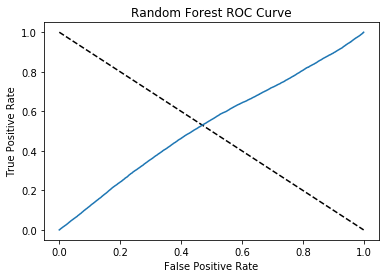

In [43]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()